# **Assignment 10**

## Eric Lehmphul

In [43]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#plotly or other graphing library

import warnings
warnings.filterwarnings("ignore")

In [44]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
boston = ds.load_boston()

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [45]:
# First 5 rows of iris dataset
X = iris.data
iris_df = pd.DataFrame(data = X, columns = iris.feature_names)

iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
# list of target for iris dataset
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [47]:


def question2(new_observations):
    # Scale data as KNN uses distance
    scaler = StandardScaler()
    scaler.fit(X)

    X_Scaled = scaler.transform(X)

    # Create train test split
    X_train, X_test, Y_train, Y_test = tts(X_Scaled, Y, test_size = 0.2)

    # Create KNN classifier with n = 5
    knn = KNN(n_neighbors = 5)

    # fit the Iris dataset on training data
    knn.fit(X_train,Y_train)

    # Predict the category of observations passed in argument new_observations

    predictions = knn.predict(new_observations)

    # Return back the target names of each prediction (and not their encoded values, i.e. return setosa instead of 0).

    le = preprocessing.LabelEncoder()
    le.fit(iris.target_names)
    iris_predictions = list(le.inverse_transform(predictions))

    return iris_predictions

In [48]:
# Get new_observations
scaler = StandardScaler()
scaler.fit(X)
X_Scaled = scaler.transform(X)
X_train, X_test, Y_train, Y_test = tts(X_Scaled, Y, test_size = 0.2)

# run function to complete question 2
question2(X_test)

['setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'setosa']

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [49]:
def question3(num_neighbors = 3, split_size = 0.2):

    # Scale data as KNN uses distance
    scaler = StandardScaler()
    scaler.fit(X)

    X_Scaled = scaler.transform(X)

    # Create train test split
    X_train, X_test, Y_train, Y_test = tts(X_Scaled, Y, test_size = split_size)

    # Create KNN classifier with n = num of neighbors
    knn = KNN(n_neighbors = num_neighbors)

    # fit the Iris dataset on training data
    knn.fit(X_train,Y_train)

    # Generate and return back an accuracy score using the test data that was split out
    knn_score = knn.score(X_test, Y_test)
    return knn_score

In [50]:
# Running question 3 with num_neighbors = 4 and split size of 0.3
question3(num_neighbors = 4, split_size = 0.3)

0.9111111111111111

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

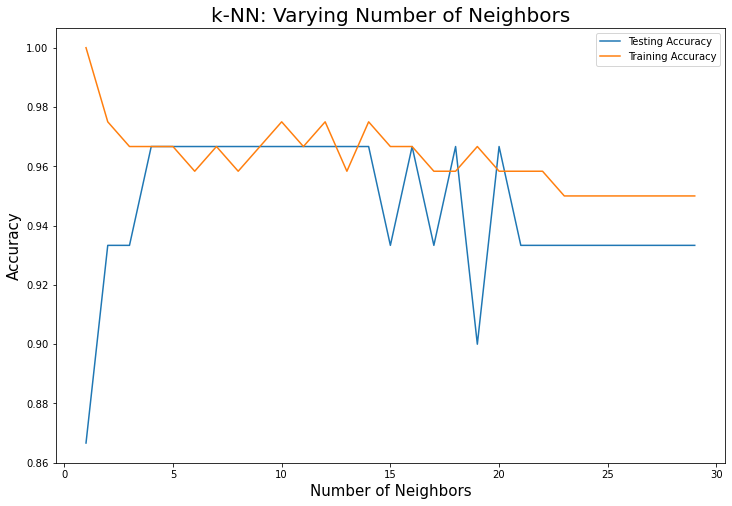

In [51]:
# Scale data as KNN uses distance
scaler = StandardScaler()
scaler.fit(X)

X_Scaled = scaler.transform(X)

# Create train test split
X_train, X_test, Y_train, Y_test = tts(X_Scaled, Y, test_size = 0.2)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = knn = KNN(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, Y_test)

# Generate plot
plt.figure(figsize=(12, 8))
plt.title('k-NN: Varying Number of Neighbors', fontsize=20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [52]:
# Store data
X = boston.data
df = pd.DataFrame(X, columns = boston.feature_names)

Y = boston.target
target = pd.DataFrame(Y)

# Get averages and target values
print('Average of AGE:', df['AGE'].mean())
print('Average of MEDV:', target[0].mean())
print('Target Values: ', target.values)


Average of AGE: 68.57490118577078
Average of MEDV: 22.532806324110698
Target Values:  [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

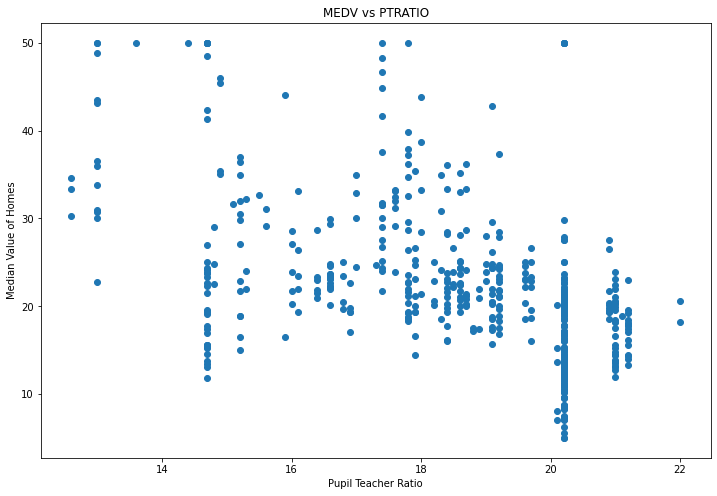

In [53]:
plt.figure(figsize=(12, 8))

# create plot
plt.scatter(df['PTRATIO'], target)

plt.xlabel('Pupil Teacher Ratio')
plt.ylabel('Median Value of Homes')
plt.title('MEDV vs PTRATIO')
plt.show()

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

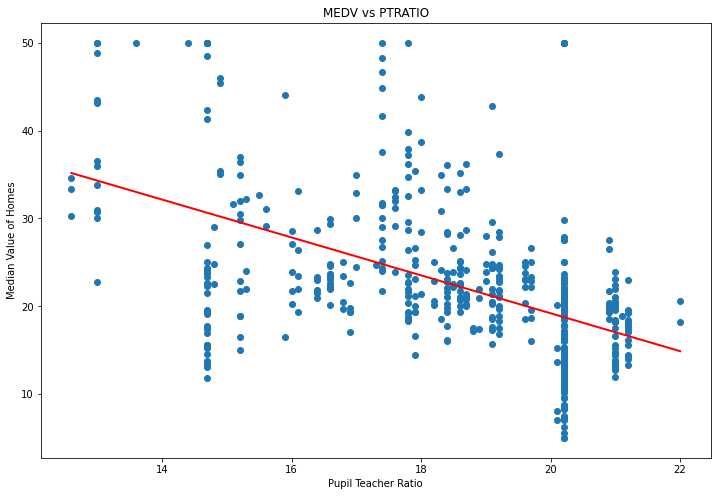

In [54]:
# Create model
linear_model = lm.LinearRegression()

ind_var = df['PTRATIO'].values.reshape(-1, 1)
dep_var = target.values.reshape(-1, 1)

# fit model
linear_model.fit(ind_var, dep_var)

# make predictions
x_range = np.linspace(min(ind_var), max(ind_var)).reshape(-1, 1)
model_predictions = linear_model.predict(x_range)

# create plot
plt.figure(figsize=(12, 8))

plt.scatter(df['PTRATIO'], target)
plt.plot(x_range, model_predictions, color='red', linewidth=2)

plt.xlabel('Pupil Teacher Ratio')
plt.ylabel('Median Value of Homes')
plt.title('MEDV vs PTRATIO')
plt.show()